# Exercise 3：
# Visualising Palmer Islands Penguin Data

## Analyse Objectives

The purpose of this data analysis report is to visualise the variables associated with a sample of penguins on the Palmer Archipelago, in order to explore and analyse the relationship between factors such as species, sex, and location on the island, and the penguins' physical attributes, including body weight, beak crest length and depth, and flipper length.

## Introduction

The raw data `Penguins.csv` consists of 334 penguin samples collected from three islands in the Palmer Archipelago, Antarctica, as well as penguin-related attribute data, including species name, island location, beak crest length, beak crest depth, flipper length, body weight, and sex.

`Penguins.csv`：
- species: the species of the penguin
- island: the island the penguin is on
- culmen_length_mm: length of the penguin's beak crest (in millimetres)
- culmen_depth_mm: depth of the penguin's beak (in millimetres)
- flipper_length_mm: length of the penguin's flipper (in millimetres)
- body_mass_g: penguin weight in grams
- sex: sex of the penguin

# Loading Data

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv('Penguins.csv')
df.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


**Summary:** No structure problem here.

#  Evaluating Data

### 1. missing Data

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


**summary:**
* 'species', 'island', 'sex' ---> Dtype:category
* 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex' exist null value.

In [39]:
df['species'] = df['species'].astype('category')
df['island'] = df['island'].astype('category')
df['sex'] = df['sex'].astype('category')

In [40]:
df.query('culmen_length_mm.isna()')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [41]:
df.query('culmen_depth_mm.isna()')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [42]:
df.query('flipper_length_mm.isna()')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [43]:
df.query('body_mass_g.isna()')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [44]:
df.drop(3, inplace=True)
df.drop(339, inplace=True)

In [45]:
df.query('sex.isna()')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


**Sumary:** Though 'sex' exists null value, other columns still could be analyzed. All data could be retained.

### 2. Duplicated Data

This dataset could exist duplicated data.

### 3. Inconsistent Data

In [46]:
df['species'].value_counts()

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [47]:
df['island'].value_counts()

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

In [48]:
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [49]:
df['sex'] = df['sex'].replace(".", np.nan)

In [50]:
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

### 4. Invalid Data

In [51]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


**Summary:** This dataset do not exist invalid data.

# Data Exploration

In [52]:
sns.set_palette("pastel")

In [53]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### 1. Proportion of penguin species

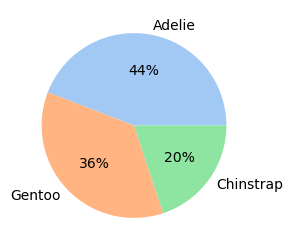

In [60]:
plt.figure(figsize=(4,3))
species_count = df['species'].value_counts()
plt.pie(species_count, autopct='%.0f%%', labels=species_count.index)
plt.show()

### 2. Proportion of penguin species

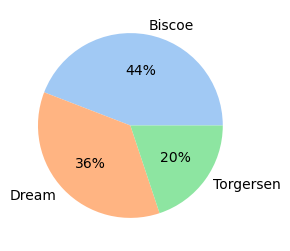

In [61]:
plt.figure(figsize=(4,3))
island_count = df['island'].value_counts()
plt.pie(species_count, autopct='%.0f%%', labels=island_count.index)
plt.show()

### 3. Proportion of penguin species

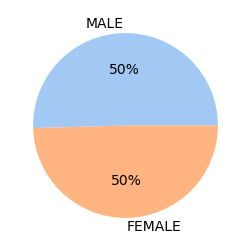

In [62]:
plt.figure(figsize=(4,3))
sex_count = df['sex'].value_counts()
plt.pie(sex_count, autopct='%.0f%%', labels=sex_count.index)
plt.show()

### 4. Penguin species in different islands

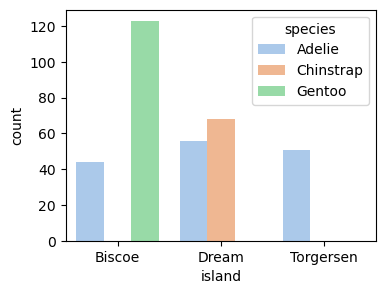

In [67]:
plt.figure(figsize=(4,3))
sns.countplot(df, x='island', hue='species')
plt.show()

### 4. Penguin sex in different islands

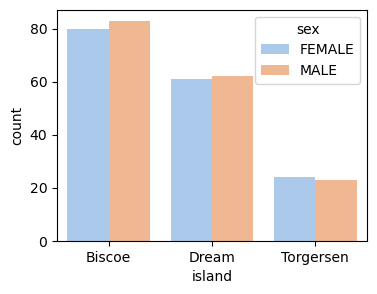

In [68]:
plt.figure(figsize=(4,3))
sns.countplot(df, x='island', hue='sex')
plt.show()

### 5. Correlation with different columns

#### Overview

/Users/luoluoluo/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


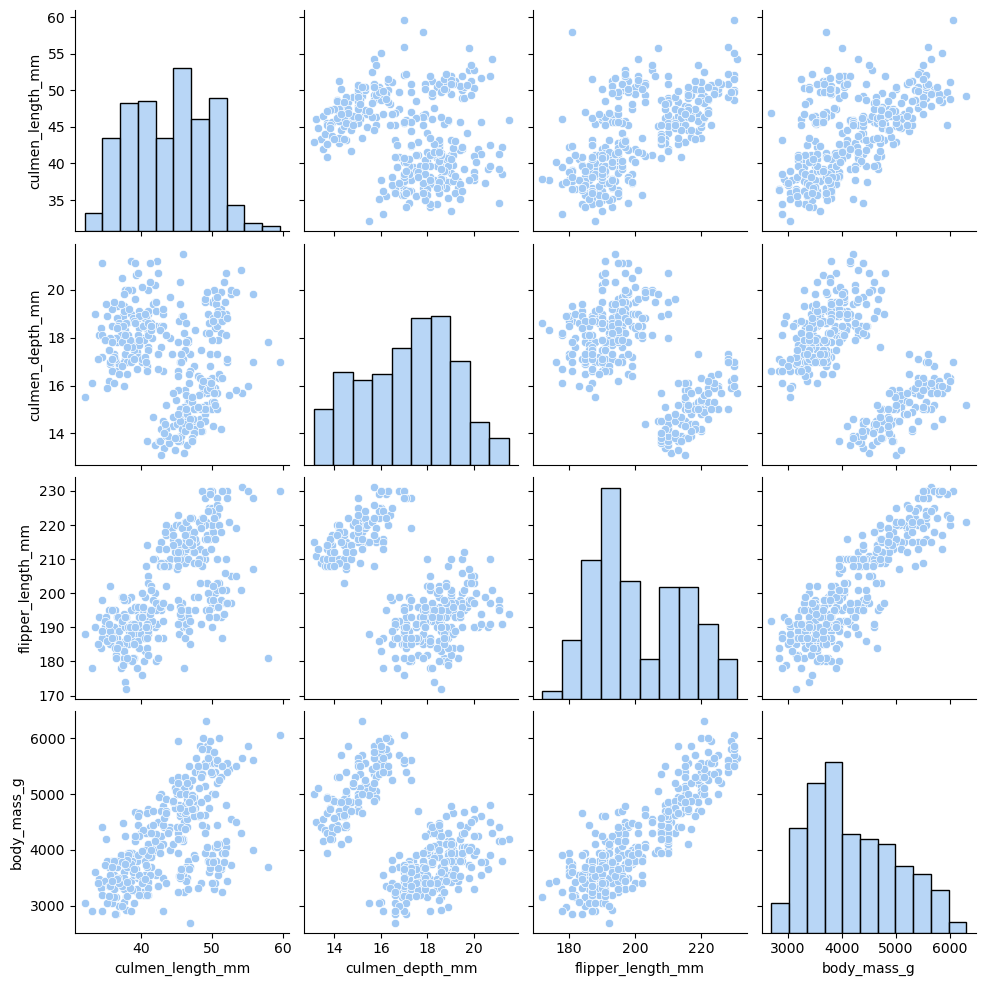

In [70]:
sns.pairplot(df)
plt.show()

* 1) 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm' and 'body_mass_g' are not normally distributed. ---> it may contain multiple sets of sample data with differences and the sample size is not large enough.
* 2) The scatterplot shows multiple clusters, which may related to cetain factors, such as penguin species and gender.

#### Depend on species

/Users/luoluoluo/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


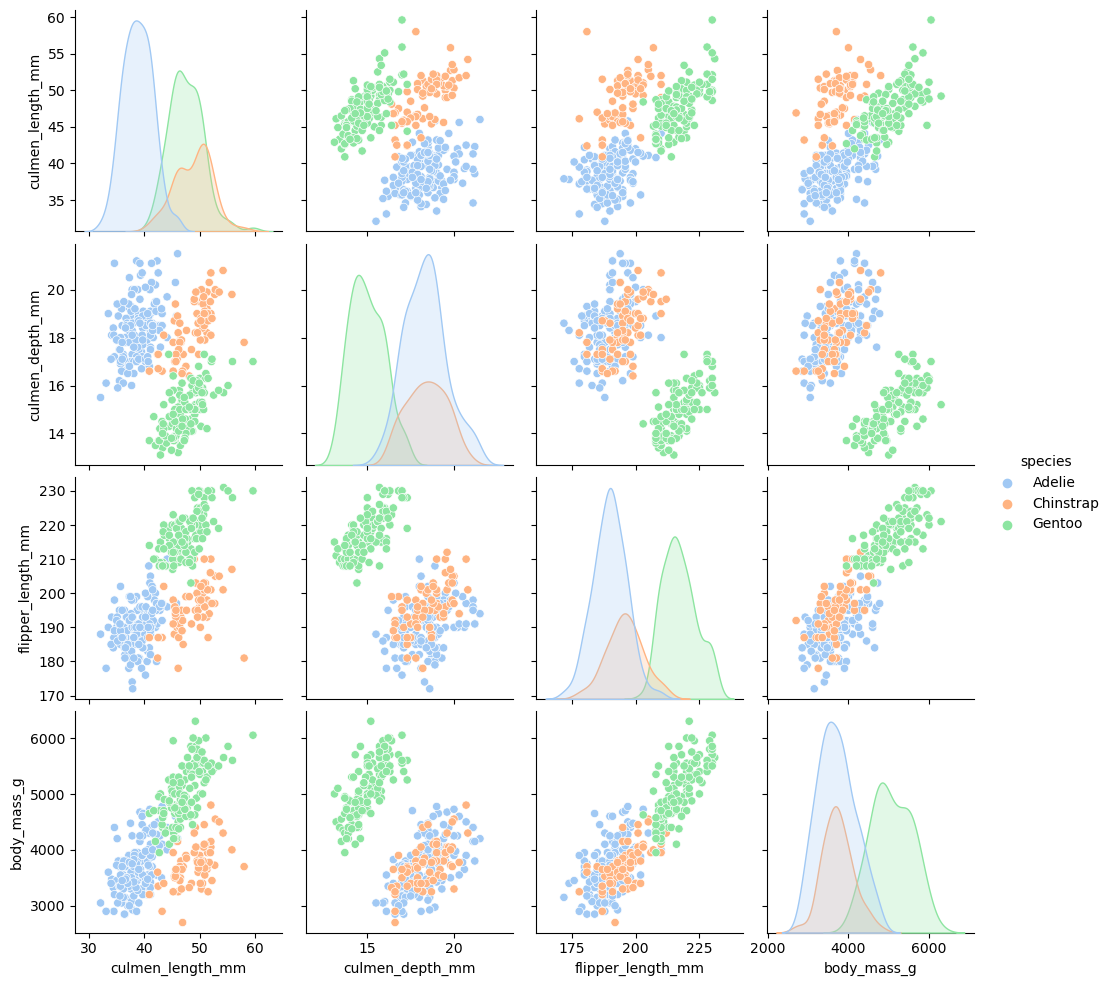

In [72]:
sns.pairplot(df, hue='species')
plt.show()